# Modelling of physical systems - assignment for lab02
## Autor: Przemysław Maresz

In [ ]:
!pip install pint open_atmos_jupyter_utils

In [186]:
import pint
import numpy as np
import matplotlib.pyplot as plt
from open_atmos_jupyter_utils import show_plot

In [187]:
si = pint.UnitRegistry()

In [188]:
M = 4.33 * si.kg            # mass of the substance [kg]
A = 0.572* si.m**2          # cross-sectional area [m^2]
D = 0.34 * si.m**2 / si.s   # diffusion coefficient [m^2 / s]
U = 0.57 * si.m / si.s      # flow velocity [m/s]

x_val = np.linspace(0, 80, 300) * si.m
t_val = np.linspace(20, 100, 500) * si.s

In [189]:
def c(x, t):
  X, T = np.meshgrid(x.magnitude, t.magnitude)
  X = X * x.units
  T = T * t.units
  return ( M * X * np.exp(-((U * T - X) ** 2) / (4 * D * T))
          / ((A * 2 * np.sqrt(np.pi * D)) * T ** 1.5))


## Spread of Substance in a Medium

The equation describes the spread of a substance (e.g., pollution) in the environment under the influence of:

- **Diffusion** – the phenomenon of particles dispersing according to the concentration gradient (described by $ D $),
- **Advection** – the transport of a substance within fluid motion (described by $ U $).

This is the analytical solution to the advection-diffusion equation:

$$
\frac{\partial C}{\partial t} + U \frac{\partial C}{\partial x} - D \frac{\partial^2 C}{\partial x^2} = 0
$$

The function $ C(x,t) $ gives the concentration of the substance at point $ x $ at time $ t $.

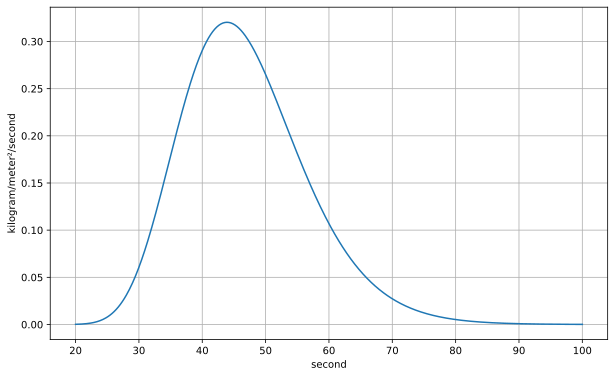

In [190]:
si.setup_matplotlib()

fig = plt.figure(figsize=(10, 6))
plt.plot(t_val, c(x_val, t_val)[:, 100])
plt.grid()
show_plot(fig=fig)